In [168]:
# shares.ipynb
# This program tries to analyse two shares of your choice & see how they are performing
# Prior to running this program, please ensure that you have matplotlib, seaborn, pandas, numpy, cufflinks and plotly libraries installed in your python

In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline()
import os
from scipy import stats

In [195]:
#Download the data in .csv format for any share that you want to analyze from NSE portal: https://www1.nseindia.com/products/content/equities/equities/eq_security.html, you can choose any time duration between 1 to 365 days & download the csv file
# Rename the downloaded file with file name as "sharesymbol.csv", example "beml.csv" in your Downloads folder
# Replace "beml" or "alembic" with the respective share name

# Creating data frame for the share by reading from the .csv file
beml_df = pd.read_csv('../Downloads/BEML.csv')
# To see the details of csv file
beml_df.info()
# Replacing empty spaces in the column name with '_'
beml_df.columns = beml_df.columns.str.replace(' ','_')
#rechecking the info to see if there's any namespace in the column name
beml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  250 non-null    object 
 1   Series                  250 non-null    object 
 2   Date                    250 non-null    object 
 3   Prev Close              250 non-null    float64
 4   Open Price              250 non-null    float64
 5   High Price              250 non-null    float64
 6   Low Price               250 non-null    float64
 7   Last Price              250 non-null    float64
 8   Close Price             250 non-null    float64
 9   Average Price           250 non-null    float64
 10  Total Traded Quantity   250 non-null    int64  
 11  Turnover                250 non-null    float64
 12  No. of Trades           250 non-null    int64  
 13  Deliverable Qty         250 non-null    int64  
 14  % Dly Qt to Traded Qty  250 non-null    fl

In [200]:
# Let's draw the candle for the chosen share
CANDLE_BEML = beml_df[['Open_Price', 'High_Price', 'Low_Price', 'Close_Price']].iplot(kind='candle')

In [201]:
# Similarly creating dataframe for other share & stripping whitespaces in the column name
alembic_df = pd.read_csv('../Downloads/alembicltd.csv')
alembic_df.columns = alembic_df.columns.str.replace(' ','_')

In [202]:
# Let's see the candle for the other chosen share
CANDLE_ALEMBIC = alembic_df[['Open_Price', 'High_Price', 'Low_Price', 'Close_Price']].iplot(kind='candle')

In [203]:
#choosing a small subset of columns for further analysis
beml_df = beml_df[['Date', 'Close_Price']]
alembic_df = alembic_df[['Date', 'Close_Price']]

In [120]:
# To show the trend of close price,sorting the rows by time in ascending order
alembic_df = alembic_df.set_index(pd.DatetimeIndex(alembic_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [121]:
alembic_df.head(5)

,Date,Close_Price
Date,,
2020-05-04,04-May-2020,49.30
2020-05-05,05-May-2020,48.80
2020-05-06,06-May-2020,48.60
2020-05-07,07-May-2020,49.50
2020-05-08,08-May-2020,48.75


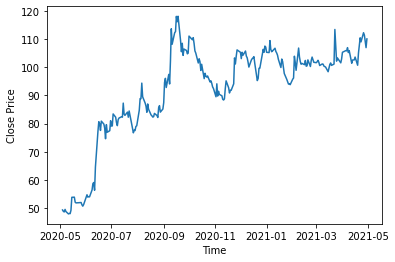

In [124]:
#plotting the trend of close price for Alembic
plt.plot(alembic_df.Close_Price);
plt.xlabel('Time');
plt.ylabel('Close Price');

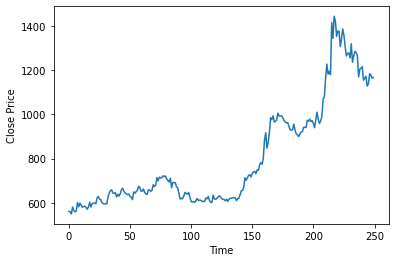

In [199]:
#plotting the trend of close price for BEML
plt.plot(beml_df.Close_Price);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [205]:
#gain represents behavior of daily returns. It's calculated as percentage change in close_price from previous day's close_price
#gain = (Close_Price(today)- Close_Price(previous day))/Close_Price(previous day)

alembic_df['gain'] = alembic_df.Close_Price.pct_change(periods=1)
beml_df['gain'] = beml_df.Close_Price.pct_change(periods= 1)

# to see the details
alembic_df.head(5)

,Date,Close_Price,gain
0,04-May-2020,49.30,NaN
1,05-May-2020,48.80,-0.010142
2,06-May-2020,48.60,-0.004098
3,07-May-2020,49.50,0.018519
4,08-May-2020,48.75,-0.015152


In [128]:
# The first day shows gain as NaN, as there's no previous day to calculate gain. Dropping first day gain 
alembic_df= alembic_df.dropna()
beml_df = beml_df.dropna()

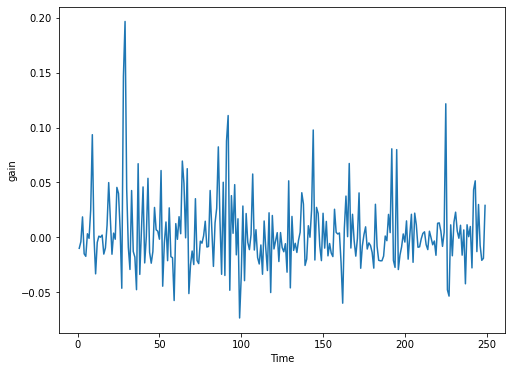

In [206]:
# Plotting gain against time
plt.figure(figsize= (8,6));
plt.plot(alembic_df.index, alembic_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

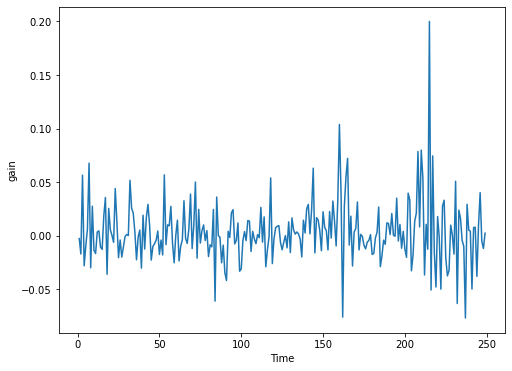

In [207]:
# Plotting gain against time
plt.figure(figsize= (8,6));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



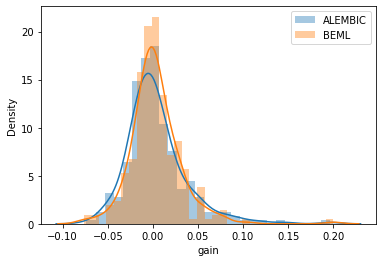

In [208]:
# Distribution plot of gain for the shares
sn.distplot(alembic_df.gain, label = 'ALEMBIC');
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [104]:
#statistical summary for share
beml_df.gain.describe()

count    249.000000
mean       0.003344
std        0.028703
min       -0.076871
25%       -0.011963
50%        0.000478
75%        0.014572
max        0.200000
Name: gain, dtype: float64

In [209]:
#statistical summary for other share
alembic_df.gain.describe()

count    249.000000
mean       0.003779
std        0.033818
min       -0.073666
25%       -0.016401
50%       -0.001041
75%        0.015328
max        0.196747
Name: gain, dtype: float64

In [132]:
# Expected range of return for 95% Confidence Interval for the share
alembic_df_ci = stats.norm.interval(0.95, loc = alembic_df.gain.mean(), scale = alembic_df.gain.std())
print("gain at 95% CI is:", np.round(alembic_df_ci, 4))

gain at 95% CI is: [-0.0625  0.0701]


In [105]:
# Expected range of return for 95% Confidence Interval for the other share
beml_df_ci = stats.norm.interval(0.95, loc = beml_df.gain.mean(), scale = beml_df.gain.std())
print("gain at 95% CI is:", np.round(beml_df_ci, 4))

gain at 95% CI is: [-0.0529  0.0596]


In [210]:
#Probability of making 2% loss or higher in share
print("probability of making 2% loss or higher in Alembic: ")
stats.norm.cdf(-0.02, loc=alembic_df.gain.mean(), scale = alembic_df.gain.std())

probability of making 2% loss or higher in Alembic: 


0.24097940237274806

In [211]:
#Probability of making 2% loss or higher in other share
print("probability of making 2% loss or higher in BEML: ")
stats.norm.cdf(-0.02, loc=beml_df.gain.mean(), scale = beml_df.gain.std())

probability of making 2% loss or higher in BEML: 


0.2080244920741992

In [136]:
#Probability of making 2% gain or higher in share
print("probability of making 2% gain or higher in Alembic: ")
1 - stats.norm.cdf(0.02, loc=alembic_df.gain.mean(), scale = alembic_df.gain.std())

probability of making 2% gain or higher in Alembic: 


0.3157339725571934

In [135]:
#Probability of making 2% loss or higher in other share
print("probability of making 2% gain or higher in BEML: ")
1 - stats.norm.cdf(0.02, loc=beml_df.gain.mean(), scale = beml_df.gain.std())

probability of making 2% gain or higher in BEML: 


0.2815337352241668

In [212]:
# Plotting Simple moving average for 7,12,21,55 days & bollinger band for the share
SMA_BEML = beml_df['Close_Price'].ta_plot(study='sma',periods=[7,13,21,55],title='Simple Moving Averages')
BOLL_BEML = beml_df['Close_Price'].ta_plot(study='boll',title='Bollinger')

In [213]:
# Plotting Simple moving average for 7,12,21,55 days & bollinger band for the other share
SMA_ALEMBIC = alembic_df['Close_Price'].ta_plot(study='sma',periods=[7,13,21,55],title='Simple Moving Averages')
BOLL_ALEMBIC = alembic_df['Close_Price'].ta_plot(study='boll',title='Bollinger')